In [3]:
import pandas as pd

file_path = r"C:\Users\DELL\Documents\uneeq\SampleSuperstore.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [4]:
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [5]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [6]:
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count}")


Duplicate Rows: 17


In [7]:
df = df.drop_duplicates()

print(f"Remaining duplicate rows: {df.duplicated().sum()}")
print(f"New dataset shape: {df.shape}")

Remaining duplicate rows: 0
New dataset shape: (9977, 13)


In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


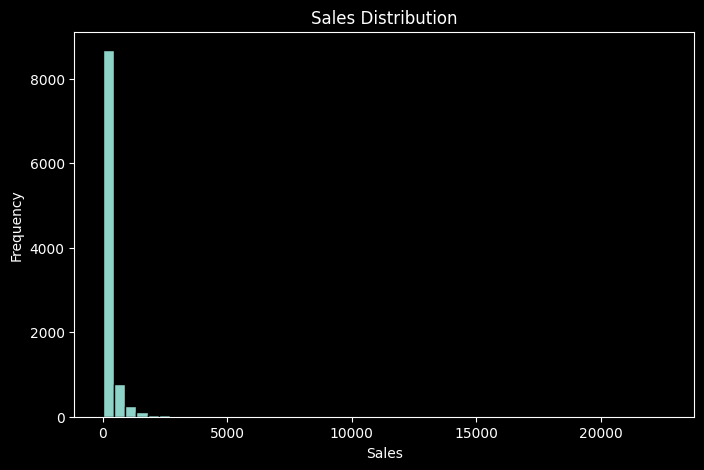

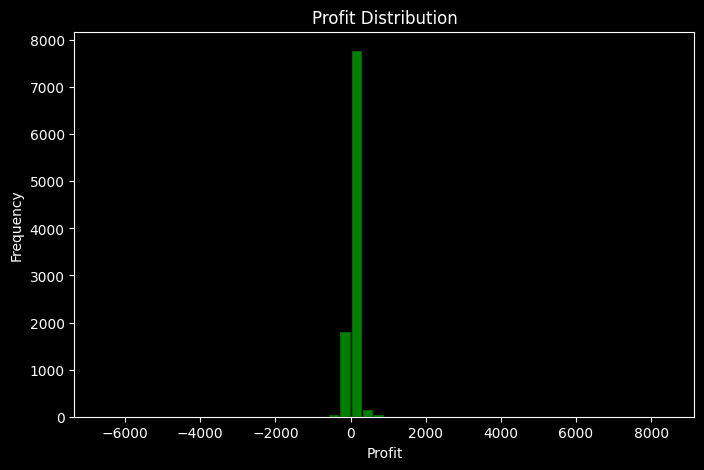

In [36]:
import matplotlib.pyplot as plt

# Sales Distribution
plt.figure(figsize=(8,5))
plt.hist(df["Sales"], bins=50, edgecolor='black')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Profit Distribution
plt.figure(figsize=(8,5))
plt.hist(df["Profit"], bins=50, edgecolor='black', color='green')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()
plt.style.use("dark_background")

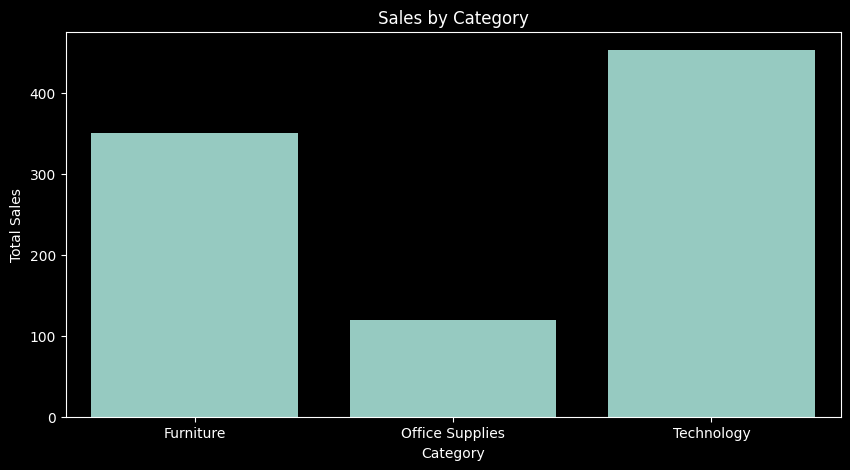

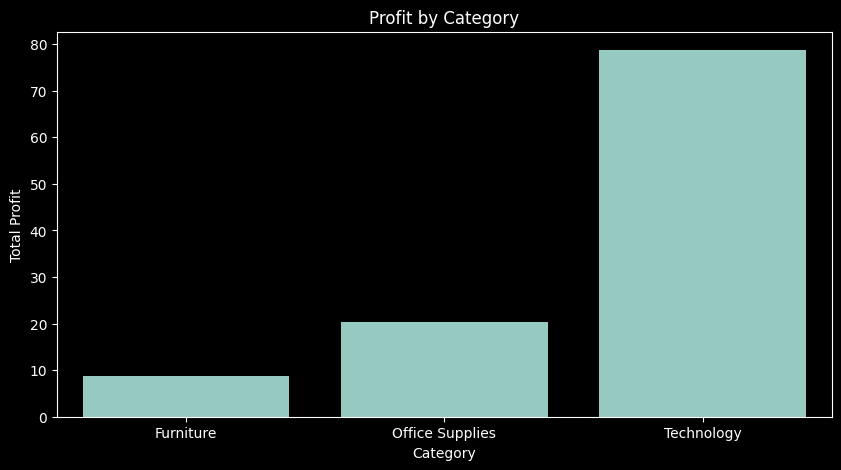

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales by Category
plt.figure(figsize=(10,5))
sns.barplot(x="Category", y="Sales", data=df, errorbar=None)
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Profit by Category
plt.figure(figsize=(10,5))
sns.barplot(x="Category", y="Profit", data=df, errorbar=None)
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.show()
plt.style.use("dark_background")

# Sales & Profit by Category
- Insights:
Technology category has the highest profit.
Furniture category has high sales but lower profit.
Office Supplies generate lower revenue but steady profit.
- Weaknesses:
Furniture has high sales but low profits possibly due to high costs or discounts.
Office Supplies may be under-marketed potential for more revenue.

# Profit Distribution
- Insights:
Majority of profits are clustered around small values.
Some orders generate extreme losses.
- Weaknesses:
Need to identify products that cause the biggest losses.
Consider adjusting pricing and cost structure.

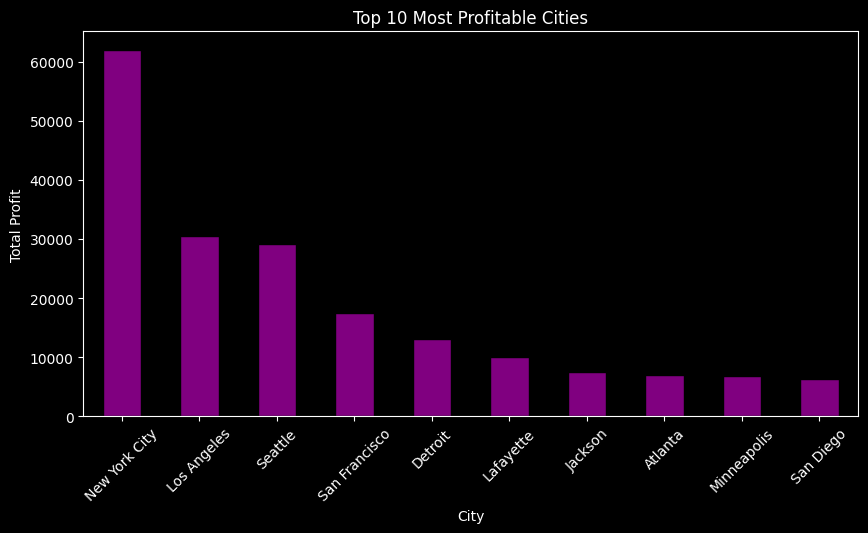

In [34]:
# Top 10 most profitable cities
top_cities = df.groupby("City")["Profit"].sum().nlargest(10)

plt.figure(figsize=(10,5))
top_cities.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 10 Most Profitable Cities")
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()
plt.style.use("dark_background")

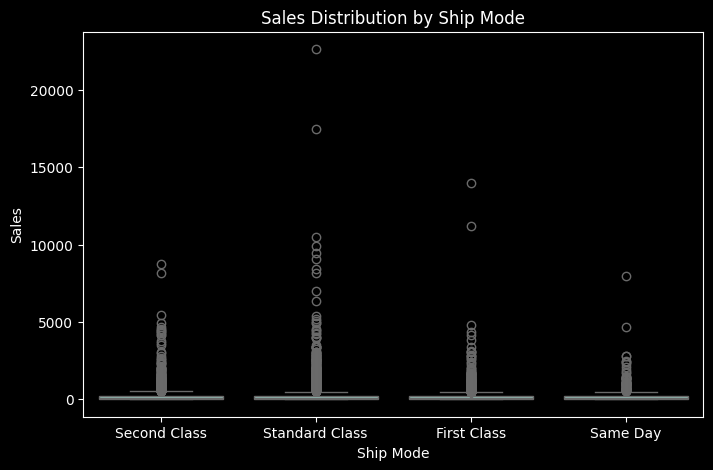

In [33]:
# Sales by Ship Mode
plt.figure(figsize=(8,5))
sns.boxplot(x="Ship Mode", y="Sales", data=df)
plt.title("Sales Distribution by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()
plt.style.use("dark_background")

# Sales Distribution by Ship Mode
- Insights:
No major difference in sales across ship modes.
Some outliers exist, meaning a few high-value orders are skewing the data.
- Weaknesses:
If shipping costs differ, the company should analyze which ship mode is the most cost-effective.

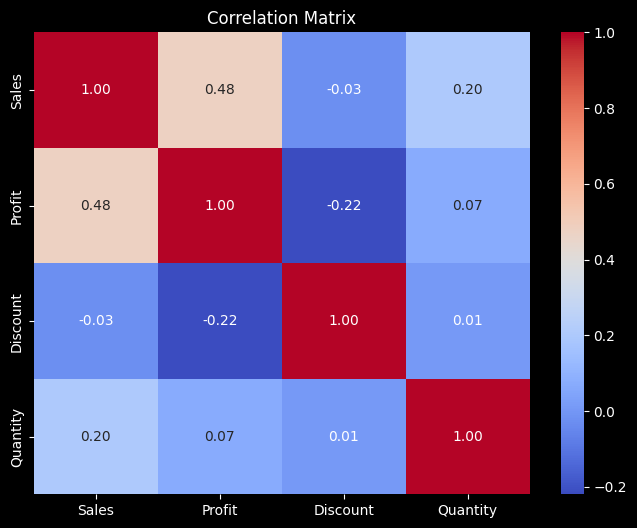

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
plt.style.use("dark_background")

# Correlation Matrix
- Insights:
 Sales and profit have a moderate positive correlation (0.48).
Discount negatively correlates with profit (-0.22).
- Weaknesses:
 Giving high discounts does NOT lead to more profit. Instead, it leads to losses.
Need to investigate discount optimization strategies.

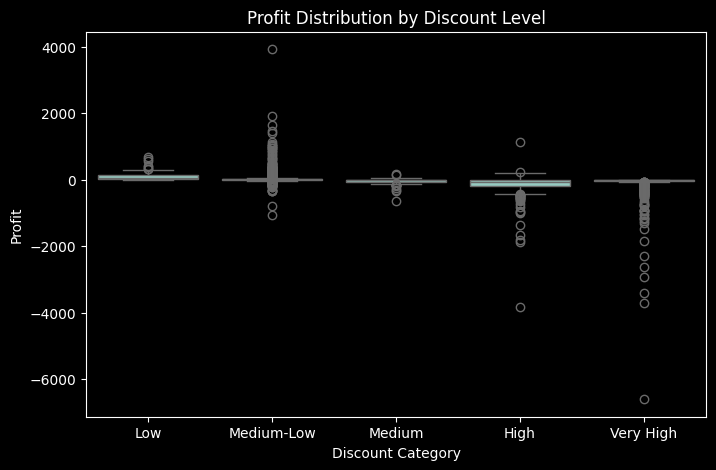

In [31]:
# Categorizing discounts into bins
df["Discount Category"] = pd.cut(df["Discount"], bins=[0, 0.1, 0.2, 0.3, 0.5, 1], labels=["Low", "Medium-Low", "Medium", "High", "Very High"])

# Profit by Discount Category
plt.figure(figsize=(8,5))
sns.boxplot(x="Discount Category", y="Profit", data=df)
plt.title("Profit Distribution by Discount Level")
plt.xlabel("Discount Category")
plt.ylabel("Profit")
plt.show()
plt.style.use("dark_background")

# Profit Distribution by Discount Level

- Insights:
  Higher discounts often lead to losses.
  Extreme discounts (above 50%) have negative profit.
- Weaknesses:
  Company might be offering unsustainable discounts.

In [18]:
# Top 10 loss-making products
loss_making = df.sort_values(by="Profit").head(10)[["Sub-Category", "Sales", "Profit"]]

# Print the result
print("Top 10 Loss-Making Products:")
print(loss_making)

Top 10 Loss-Making Products:
     Sub-Category      Sales     Profit
7772     Machines   4499.985 -6599.9780
683      Machines   7999.980 -3839.9904
9774      Binders   2177.584 -3701.8928
3011     Machines   2549.985 -3399.9800
4991      Binders   1889.990 -2929.4845
3151     Machines   1799.994 -2639.9912
5310      Binders   1525.188 -2287.7820
9639       Tables   4297.644 -1862.3124
1199      Binders   1088.792 -1850.9464
2697     Machines  22638.480 -1811.0784


# Top Loss-Making Products
- Insights:
Machines and Binders appear multiple times in the loss-making products.
Machines have high sales but negative profits.
- Weaknesses:
Need to review pricing, cost, and discount strategy for Machines and Binders.
Could be high costs, heavy discounts, or poor supplier deals.

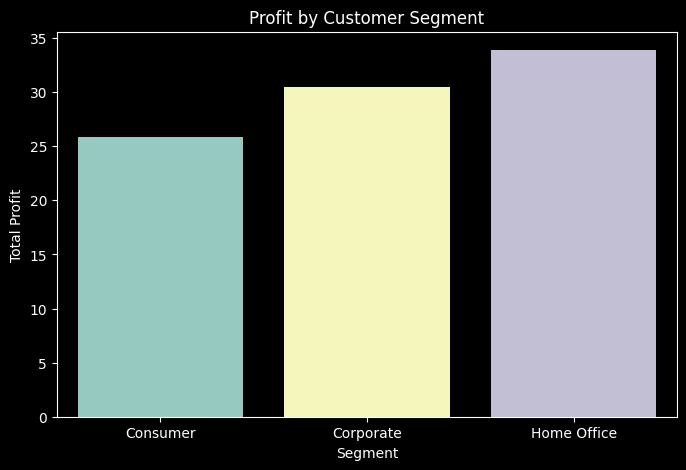

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Profit by Segment (Updated Code)
plt.figure(figsize=(8,5))
sns.barplot(x="Segment", y="Profit", data=df, errorbar=None, hue="Segment", legend=False)
plt.title("Profit by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.show()
plt.style.use("dark_background")

# Profit by Customer Segment
- Insights:
Home Office is the most profitable segment.
Consumer segment is the least profitable.
- Weaknesses:
The Consumer segment needs more analysis—perhaps high discounts or lower margins are affecting profitability.
Consider targeting corporate customers more aggressively.


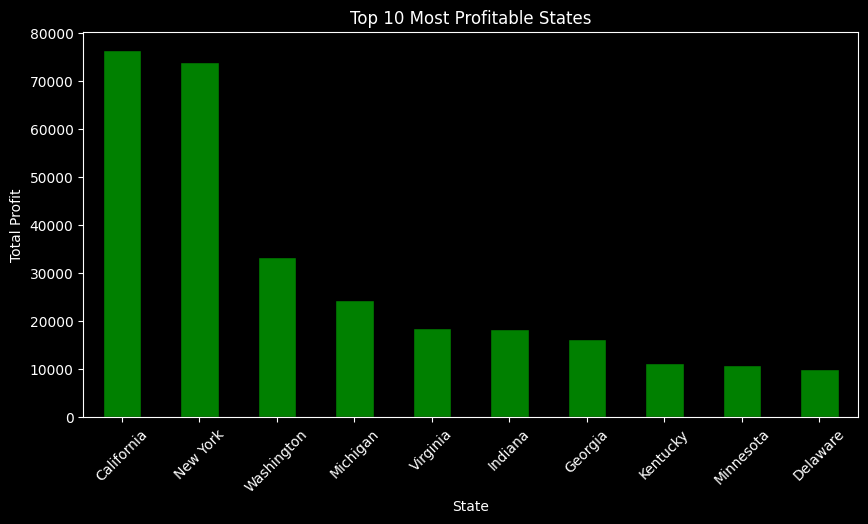

In [29]:
# Top 10 Most Profitable States
top_states = df.groupby("State")["Profit"].sum().nlargest(10)

plt.figure(figsize=(10,5))
top_states.plot(kind='bar', color='green', edgecolor='black')
plt.title("Top 10 Most Profitable States")
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()
plt.style.use("dark_background")

In [23]:
# Filter products with high discounts and negative profit
high_discount_loss = df[(df["Discount"] > 0.3) & (df["Profit"] < 0)]

# Group by Sub-Category to see which products suffer the most
discount_loss_summary = high_discount_loss.groupby("Sub-Category")["Profit"].sum().sort_values()

# Display the worst-affected products
print("High-Discount Products Causing Losses:")
print(discount_loss_summary.head(10))

High-Discount Products Causing Losses:
Sub-Category
Binders       -38504.2594
Machines      -30099.1982
Tables        -27295.8952
Bookcases     -10541.8888
Appliances     -8629.6412
Phones         -6715.7800
Furnishings    -5944.6552
Name: Profit, dtype: float64


# High-Discount Products Causing Major Losses
- Findings:
Binders (-$38,504) and Machines (-$30,099) suffer the most.
Tables, Bookcases, and Appliances also have significant losses.
Even Phones are losing money despite being a high-demand product.
- Key Issue:
Excessive discounts are eating into profit margins.
Binders and Machines show huge losses at 70-80% discounts (unsustainable!).

In [25]:
# Analyzing Furniture category
furniture_analysis = df[df["Category"] == "Furniture"].groupby("Sub-Category")[["Sales", "Profit"]].sum()

# Sorting by Profit
furniture_analysis = furniture_analysis.sort_values("Profit")

# Display results
print("Furniture Sales vs Profit Breakdown:")
print(furniture_analysis)


Furniture Sales vs Profit Breakdown:
                    Sales      Profit
Sub-Category                         
Tables        206965.5320 -17725.4811
Bookcases     114879.9963  -3472.5560
Furnishings    91683.0240  13052.7230
Chairs        327777.7610  26567.1278


# Furniture Category: High Sales, Low Profit
- Findings:
Tables (-$17,725) and Bookcases (-$3,472) are dragging down profits.
Chairs ($26,567 profit) and Furnishings ($13,052 profit) are performing well.
- Key Issue:
Tables have high sales but extreme losses—possibly high production costs or deep discounting.
Furniture bulk discounts might be cutting margins too much.

In [26]:
# Extracting only Machines and Binders
loss_analysis = df[df["Sub-Category"].isin(["Machines", "Binders"])].groupby(["Sub-Category", "Discount"])[["Sales", "Profit"]].sum()

# Sorting by the biggest losses
loss_analysis = loss_analysis.sort_values("Profit")

# Display results
print("Machines & Binders Loss Analysis:")
print(loss_analysis.head(10))


Machines & Binders Loss Analysis:
                           Sales      Profit
Sub-Category Discount                       
Binders      0.8       13577.658 -21903.1610
Machines     0.7       15601.509 -19579.3191
Binders      0.7       22559.391 -16601.0984
Machines     0.5       37935.070  -7635.2291
             0.4       19546.224  -2666.8434
             0.3        3756.305    326.0395
             0.1        3410.955    832.0843
             0.2       37954.568   4970.2024
             0.0       71034.000  27137.8223
Binders      0.2       85442.640  29417.8090


# Machines & Binders: Discounts Causing Direct Losses
- Findings:
Machines at 70% discount = $19,579 loss 
Binders at 80% discount = $21,903 loss 
- Key Issue:
These products sell well, but at a loss.
Discounting at 70-80% is completely unsustainable.

In [27]:
# Group by state and city to find where profit is negative
underperforming_states = df.groupby("State")["Profit"].sum().sort_values().head(10)
underperforming_cities = df.groupby("City")["Profit"].sum().sort_values().head(10)

# Display results
print(" Bottom 10 States by Profit:")
print(underperforming_states)

print("\n Bottom 10 Cities by Profit:")
print(underperforming_cities)


 Bottom 10 States by Profit:
State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1194.0993
Name: Profit, dtype: float64

 Bottom 10 Cities by Profit:
City
Philadelphia   -13843.2106
Houston        -10175.1755
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6648.3318
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64


# Underperforming States & Cities
- Findings:
Texas (-$25,750), Ohio (-$16,959), and Pennsylvania (-$15,565) have the worst losses.
Philadelphia (-$13,843) and Houston (-$10,175) are the worst cities.
- Key Issue:
These locations may have high costs, low demand, or high competition.
Marketing, logistics, or pricing issues could be causing losses.

In [37]:
cleaned_file_path = r"C:\Users\DELL\Documents\uneeq\SampleSuperstore_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")

Cleaned dataset saved at: C:\Users\DELL\Documents\uneeq\SampleSuperstore_Cleaned.csv
